# NEAT Algorithm-based Stock Trading Strategy with Multiple Technical Indicators Resonance

In [1]:
from neat_trader.algorithm import NeatTrader, Evaluator, gpt_fitness_fn
import neat

c:\Users\USER\.conda\envs\neat\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Train the model

In [2]:
config_file_path = 'model/config-feedforward'
config = neat.Config(neat.DefaultGenome, neat.DefaultReproduction,
                           neat.DefaultSpeciesSet, neat.DefaultStagnation,
                           config_file_path)

In [3]:
evaluator = Evaluator(fitness_fn=gpt_fitness_fn)
trader = NeatTrader(config=config, evaluator=evaluator)

In [4]:
winner = trader.evolve(total_generation=10)


 ****** Running generation 0 ****** 

Population's average fitness: 0.00000 stdev: 0.00000
Best fitness: 0.00000 - size: (3, 36) - species 1 - id 1
Average adjusted fitness: 0.000
Mean genetic distance 1.088, standard deviation 0.224
Population of 256 members in 1 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1    0   256      0.0    0.000     0
Total extinctions: 0
Generation time: 7.707 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.00000 stdev: 0.00000
Best fitness: 0.00000 - size: (3, 36) - species 1 - id 1
Average adjusted fitness: 0.000
Mean genetic distance 1.186, standard deviation 0.240
Population of 256 members in 1 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1    1   256      0.0    0.000     1
Total extinctions: 0
Generation time: 2.326 sec (5.016 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.00000 stdev: 0.


Best genome:
Key: 2418
Fitness: 0.1129527764400465
Nodes:
	0 DefaultNodeGene(key=0, bias=-1.2774737286439393, response=1.0, activation=sigmoid, aggregation=sum)
	1 DefaultNodeGene(key=1, bias=-1.2647079118159683, response=1.0, activation=sigmoid, aggregation=sum)
	2 DefaultNodeGene(key=2, bias=0.7546599722414407, response=1.0, activation=sigmoid, aggregation=sum)
Connections:
	DefaultConnectionGene(key=(-11, 1), weight=2.603896706847815, enabled=True)
	DefaultConnectionGene(key=(-11, 2), weight=1.2543361626306495, enabled=True)
	DefaultConnectionGene(key=(-10, 0), weight=1.1017922378501932, enabled=True)
	DefaultConnectionGene(key=(-10, 1), weight=1.7481909796788682, enabled=False)
	DefaultConnectionGene(key=(-10, 2), weight=3.1728017356930898, enabled=True)
	DefaultConnectionGene(key=(-9, 0), weight=-1.1116767120263358, enabled=True)
	DefaultConnectionGene(key=(-9, 1), weight=0.44574698829347015, enabled=True)
	DefaultConnectionGene(key=(-9, 2), weight=-0.31923905304490663, enabled=T

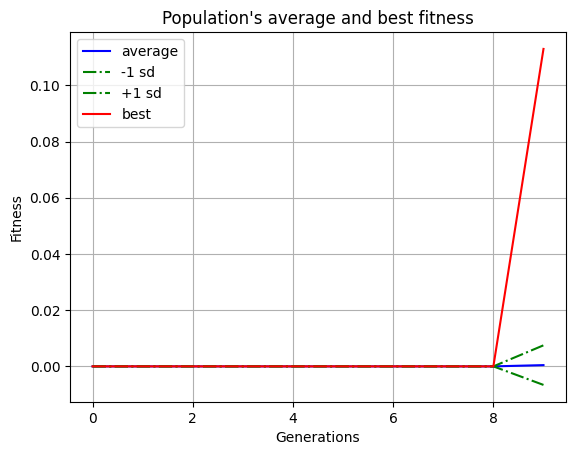

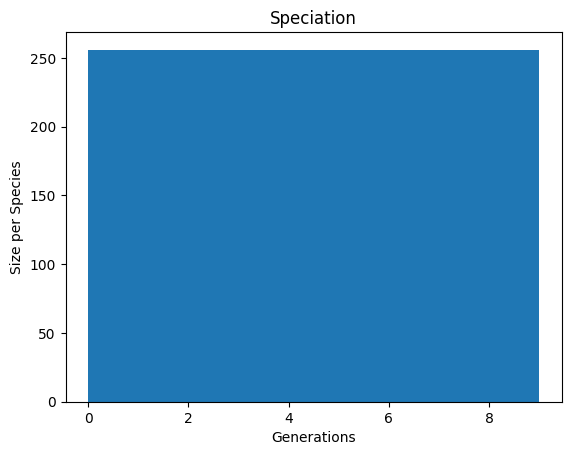

In [5]:
trader.generate_report()

## Evaluation


In [6]:
# Evaluate the last generation
performances, backtesting_data = trader.test_population()

Testing population: 100%|██████████| 10/10 [01:13<00:00,  7.35s/it]


In [7]:
performances.head()

,individual_index,test_case,performance,bt
0,2418,0,Start 2013-07-08 00:00:00 ...,<backtesting.backtesting.Backtest object at 0x...
1,2430,0,Start 2013-07-08 00:00:00 ...,<backtesting.backtesting.Backtest object at 0x...
2,2543,0,Start 2013-07-08 00:00:00 ...,<backtesting.backtesting.Backtest object at 0x...
3,2544,0,Start 2013-07-08 00:00:00 ...,<backtesting.backtesting.Backtest object at 0x...
4,2545,0,Start 2013-07-08 00:00:00 ...,<backtesting.backtesting.Backtest object at 0x...


In [11]:
performances.loc[0, 'performance']

Start                     2013-07-08 00:00:00
End                       2013-11-01 00:00:00
Duration                    116 days 00:00:00
Exposure Time [%]                   36.904762
Equity Final [$]                 992887.77654
Equity Peak [$]                1038704.670828
Return [%]                          -0.711222
Buy & Hold Return [%]               -1.645521
Return (Ann.) [%]                   -2.118528
Volatility (Ann.) [%]               10.497159
Sharpe Ratio                        -0.201819
Sortino Ratio                       -0.269125
Calmar Ratio                        -0.277134
Max. Drawdown [%]                   -7.644418
Avg. Drawdown [%]                   -2.876107
Max. Drawdown Duration       32 days 00:00:00
Avg. Drawdown Duration       14 days 00:00:00
# Trades                                    1
Win Rate [%]                              0.0
Best Trade [%]                      -0.712686
Worst Trade [%]                     -0.712686
Avg. Trade [%]                    

In [15]:
import pandas as pd
import plotly.express as px
relative_performance = pd.DataFrame({
    'Buy & Hold Strategy': performances['performance'].apply(lambda x: x['Buy & Hold Return [%]']),
    'Neat Strategy': performances['performance'].apply(lambda x: x['Return [%]']),
    'Individual': performances['individual_index']
})
px.scatter(relative_performance, x='Buy & Hold Strategy', y='Neat Strategy', color='Individual').show()
#relative_performance